## ANN

In [24]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
X = df[['Time_of_departure', 'Length_of_Fligh', 'Airline_ID', 'AirportTo']]
Y = df[['Class']]

In [27]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [28]:
X_train

,Time_of_departure,Length_of_Fligh,Airline_ID,AirportTo
471275,0.318404,0.203053,0.470588,0.119863
132519,0.612316,0.206107,0.941176,0.328767
359923,0.682295,0.175573,0.882353,0.948630
330084,0.633310,0.178626,0.294118,0.544521
143429,0.515045,0.233588,0.705882,0.767123
...,...,...,...,...
110268,0.542337,0.239695,1.000000,0.205479
259178,0.279916,0.282443,0.058824,0.273973
365838,0.731281,0.282443,0.294118,0.356164
131932,0.818754,0.106870,0.882353,0.291096


In [29]:
Y_train

,Class
471275,1
132519,0
359923,1
330084,0
143429,1
...,...
110268,0
259178,1
365838,1
131932,0


## Choosing neurons

In [35]:
%%time 

units = range(20, 31)
for unit in units:
    ANN_model = (tf.keras.Sequential([
    layers.Dense(units = unit, activation='relu'),
    layers.Dense(units = unit, activation='relu'),
    layers.Dense(units = unit, activation='relu'),
    layers.Dense(units = unit, activation='relu'), 
    layers.Dense(units = 1, activation="sigmoid")]))
    ANN_model.compile(optimizer= 'adam', loss="mean_absolute_error",metrics=['accuracy'])
    history = ANN_model.fit(X_train, Y_train, epochs= 1, batch_size=32, verbose=1) 
    print('Accuracy for the {0} neurons is: {1}'.format(unit, ANN_model.evaluate(X_test,Y_test,verbose=2)))

11799/11799 [==============================] - 49s 4ms/step - loss: 0.4452 - accuracy: 0.5552
5057/5057 - 8s - loss: 0.4471 - accuracy: 0.5529 - 8s/epoch - 2ms/step
Accuracy for the 20 neurons is: [0.44705989956855774, 0.5529400706291199]
11799/11799 [==============================] - 48s 4ms/step - loss: 0.4453 - accuracy: 0.5553
5057/5057 - 9s - loss: 0.4471 - accuracy: 0.5529 - 9s/epoch - 2ms/step
Accuracy for the 21 neurons is: [0.44705989956855774, 0.5529400706291199]
11799/11799 [==============================] - 48s 4ms/step - loss: 0.4452 - accuracy: 0.5552
5057/5057 - 8s - loss: 0.4471 - accuracy: 0.5529 - 8s/epoch - 2ms/step
Accuracy for the 22 neurons is: [0.44705989956855774, 0.5529400706291199]
11799/11799 [==============================] - 48s 4ms/step - loss: 0.4453 - accuracy: 0.5551
5057/5057 - 8s - loss: 0.4471 - accuracy: 0.5529 - 8s/epoch - 2ms/step
Accuracy for the 23 neurons is: [0.44705989956855774, 0.5529400706291199]
11799/11799 [==============================]

Accuracies are almost the same, But the slightly high accuracy is in 20 neurons

*   loss : MSE = 0.4453 
*   accuracy : 0.5552
*   CPU times: : total = 12min 29s
*   Wall time: 15min 7s






## Choosing Optimizer

In [37]:
%%time 

optimizers = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
for optimizer in optimizers:
    ANN_model = (tf.keras.Sequential([
    layers.Dense(units = 20, activation='relu'),
    layers.Dense(units = 20, activation='relu'),
    layers.Dense(units = 20, activation='relu'),
    layers.Dense(units = 20, activation='relu'), 
    layers.Dense(units = 1, activation="sigmoid")]))
    ANN_model.compile(optimizer= optimizer, loss="mean_absolute_error",metrics=['accuracy'])
    history_1 = ANN_model.fit(X_train, Y_train, epochs= 1, batch_size=32, verbose=1) 
    print('Accuracy for the {0} optimizer is: {1}'.format(optimizer, ANN_model.evaluate(X_test,Y_test,verbose=2)))

11799/11799 [==============================] - 43s 4ms/step - loss: 0.4516 - accuracy: 0.5553
5057/5057 - 9s - loss: 0.4473 - accuracy: 0.5529 - 9s/epoch - 2ms/step
Accuracy for the SGD optimizer is: [0.4472723603248596, 0.5529400706291199]
11799/11799 [==============================] - 48s 4ms/step - loss: 0.4452 - accuracy: 0.5552
5057/5057 - 9s - loss: 0.4471 - accuracy: 0.5529 - 9s/epoch - 2ms/step
Accuracy for the Adam optimizer is: [0.44705989956855774, 0.5529400706291199]
11799/11799 [==============================] - 43s 4ms/step - loss: 0.4453 - accuracy: 0.5552
5057/5057 - 9s - loss: 0.4471 - accuracy: 0.5529 - 9s/epoch - 2ms/step
Accuracy for the RMSprop optimizer is: [0.44705989956855774, 0.5529400706291199]
11799/11799 [==============================] - 44s 4ms/step - loss: 0.4986 - accuracy: 0.5544
5057/5057 - 9s - loss: 0.4979 - accuracy: 0.5529 - 9s/epoch - 2ms/step
Accuracy for the Adadelta optimizer is: [0.49786999821662903, 0.5529400706291199]
11799/11799 [==========

Accuracies are almost the same, So we are going to choose 'adam' optimizer

- loss : MSE = 0.4471 
- accuracy : 0.5529 
- CPU times: : total = total: 10min
- Wall time: 11min 56s

## Choosing activation function

In [42]:
%%time 

activations = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu','elu', 'exponential', 'LeakyReLU']
for activation in activations:
    ANN_model = (tf.keras.Sequential([
    layers.Dense(units = 20, activation = activation),
    layers.Dense(units = 20, activation = activation),
    layers.Dense(units = 20, activation = activation), 
    layers.Dense(units = 20, activation = activation), 
    layers.Dense(units = 1, activation="sigmoid")]))
    ANN_model.compile(optimizer= 'adam', loss="mean_absolute_error",metrics=['accuracy'])
    history_2 = ANN_model.fit(X_train, Y_train, epochs= 1, batch_size=32, verbose=1)
    print('Accuracy and loss for the {0} activation function is: {1}'.format(activation, ANN_model.evaluate(X_test,Y_test,verbose=2))) 

11799/11799 [==============================] - 61s 5ms/step - loss: 0.4454 - accuracy: 0.5552
5057/5057 - 11s - loss: 0.4471 - accuracy: 0.5529 - 11s/epoch - 2ms/step
Accuracy and loss for the relu activation function is: [0.44705989956855774, 0.5529400706291199]
11799/11799 [==============================] - 47s 4ms/step - loss: 0.4451 - accuracy: 0.5552
5057/5057 - 9s - loss: 0.4471 - accuracy: 0.5529 - 9s/epoch - 2ms/step
Accuracy and loss for the sigmoid activation function is: [0.44705989956855774, 0.5529400706291199]
11799/11799 [==============================] - 47s 4ms/step - loss: 0.4450 - accuracy: 0.5551
5057/5057 - 9s - loss: 0.4471 - accuracy: 0.5529 - 9s/epoch - 2ms/step
Accuracy and loss for the softplus activation function is: [0.44705989956855774, 0.5529400706291199]
11799/11799 [==============================] - 48s 4ms/step - loss: 0.4452 - accuracy: 0.5552
5057/5057 - 8s - loss: 0.4471 - accuracy: 0.5529 - 8s/epoch - 2ms/step
Accuracy and loss for the softsign activ

WE will choose relu activation function
- loss : MSE = 0.4471 
- accuracy : 0.5529
- CPU times: : total = total : 10min 14s
- Wall time: 12min 40s

In [43]:
%%time 

epochs = range(1, 5)
for epoch in epochs:
    ANN_model = (tf.keras.Sequential([
    layers.Dense(units = 20, activation='relu'),
    layers.Dense(units = 20, activation='relu'),
    layers.Dense(units = 20, activation='relu'),
    layers.Dense(units = 20, activation='relu'), 
    layers.Dense(units = 1, activation="sigmoid")]))
    ANN_model.compile(optimizer= 'adam', loss="mean_absolute_error",metrics=['accuracy'])
    history_3 = ANN_model.fit(X_train, Y_train, epochs= epoch, batch_size=32, verbose=1)
    print('Accuracy and loss for the {0} epoch\s function is: {1}'.format(epoch, ANN_model.evaluate(X_test,Y_test,verbose=2))) 

11799/11799 [==============================] - 60s 5ms/step - loss: 0.4455 - accuracy: 0.5552
5057/5057 - 8s - loss: 0.4471 - accuracy: 0.5529 - 8s/epoch - 2ms/step
Accuracy and loss for the 1 epoch\s function is: [0.44705989956855774, 0.5529400706291199]
Epoch 1/2
11799/11799 [==============================] - 47s 4ms/step - loss: 0.4455 - accuracy: 0.5551
Epoch 2/2
11799/11799 [==============================] - 45s 4ms/step - loss: 0.4448 - accuracy: 0.5552
5057/5057 - 10s - loss: 0.4471 - accuracy: 0.5529 - 10s/epoch - 2ms/step
Accuracy and loss for the 2 epoch\s function is: [0.44705989956855774, 0.5529400706291199]
Epoch 1/3
11799/11799 [==============================] - 47s 4ms/step - loss: 0.4456 - accuracy: 0.5549
Epoch 2/3
11799/11799 [==============================] - 45s 4ms/step - loss: 0.4448 - accuracy: 0.5552
Epoch 3/3
11799/11799 [==============================] - 49s 4ms/step - loss: 0.4448 - accuracy: 0.5552
5057/5057 - 9s - loss: 0.4471 - accuracy: 0.5529 - 9s/epoch 

Accuracies are almost the same, so due the computational power we will choose 1 epoch

- loss : MSE = 0.4471
- accuracy : 0.5529 
- CPU times: : total = total : total: 10min 10s
- Wall time: 10min 45s

In [44]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history_1.history['loss'], label='loss1')
    plt.plot(history_2.history['loss'], label='loss2')
    plt.plot(history_3.history['loss'], label='loss3')
    plt.xlabel('huperparameter tuning')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)

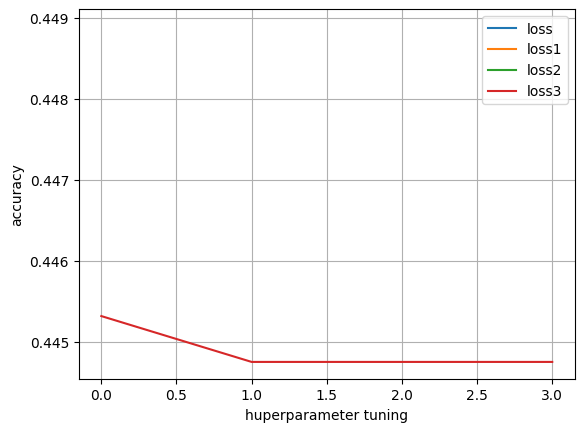

In [45]:
plot_loss(history)

In [50]:
%%time 
from tensorflow.python.framework.ops import LazyLoader
Y_pred = ANN_model.predict(X_test)

5057/5057 [==============================] - 9s 2ms/step
CPU times: user 12.2 s, sys: 768 ms, total: 12.9 s
Wall time: 11.7 s
